In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
#import
import seaborn as sns
import matplotlib.pyplot as plt

## Read Data

In [3]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Join train and test in a dataset

In [5]:
titanic = pd.concat([train_data, test_data], ignore_index=True, sort  = False)

# Exploratory Data Analysis

Quick Look at data structure

In [6]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


We can see the missing value : Cabin, Age, Embark and Fare

Text(0.5, 1.0, 'Missing values heatmap')

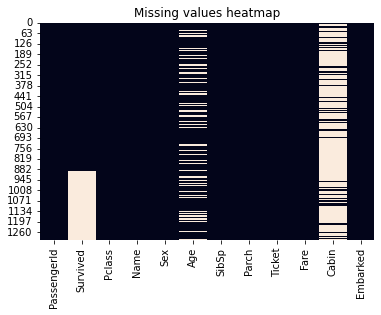

In [8]:
sns.heatmap(titanic.isnull(), cbar = False).set_title("Missing values heatmap")

In [9]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Feature types
- Numeric
    - Discret: Age
    - Continuos: Fare
- Categorical
    - Nominal: Sex, Embarked
    - Binary: Survived
    - Ordinal: PassengerId, Pclass

In [10]:
df_num = train_data[['Age','SibSp','Parch','Fare']]
df_cat = train_data[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

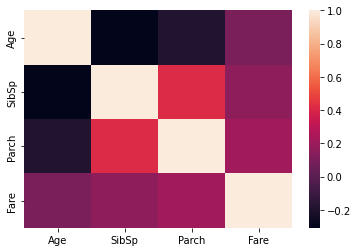

In [11]:
print(df_num.corr())
sns.heatmap(df_num.corr())

In [12]:
pd.pivot_table(train_data, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [13]:
round (train_data.isnull().sum().sort_values(ascending=False)/len(train_data)*100,1)

Cabin          77.1
Age            19.9
Embarked        0.2
PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
dtype: float64

Cabin look useless but could be transformed in other variable
Age is the main problem, filling that could be key.
Embarked and Fare can be filled with mean or median value.


### Survived
Only survived 38,4% of passengers.

In [14]:
round(train_data[['Survived']].mean()*100,1)

Survived    38.4
dtype: float64

### Pclass

In [15]:
round(train_data[['Pclass','Survived']].groupby('Pclass').agg(['count','mean']),3)

Survived       
          count   mean
Pclass                
1           216  0.630
2           184  0.473
3           491  0.242

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

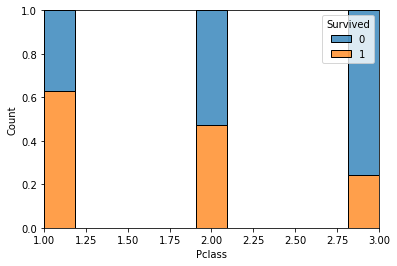

In [16]:
sns.histplot(x='Pclass', data=train_data, hue='Survived', multiple='fill')

### Sex

In [17]:
round(train_data [['Sex','Survived']].groupby(['Sex']).agg(['count','mean']),3)

Survived       
          count   mean
Sex                   
female      314  0.742
male        577  0.189

<AxesSubplot:xlabel='Sex', ylabel='Count'>

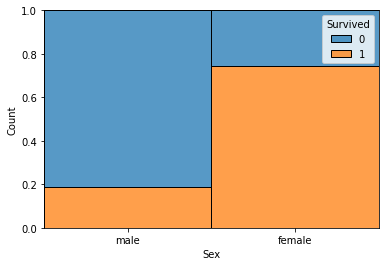

In [18]:
sns.histplot(x='Sex', data=train_data, hue='Survived', multiple='fill')

Sex-Pclass Interaction

In [19]:
round(train_data [['Sex', 'Pclass','Survived']].groupby(['Pclass', 'Sex']).agg(['count','mean']),3)

Survived       
                 count   mean
Pclass Sex                   
1      female       94  0.968
       male        122  0.369
2      female       76  0.921
       male        108  0.157
3      female      144  0.500
       male        347  0.135

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

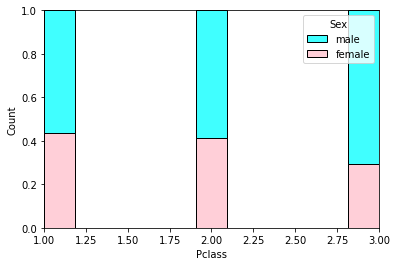

In [20]:
sns.histplot(x='Pclass', data=train_data, hue='Sex', multiple='fill', palette={"male": "cyan", "female": "pink"})

### Age

<AxesSubplot:xlabel='Age', ylabel='Count'>

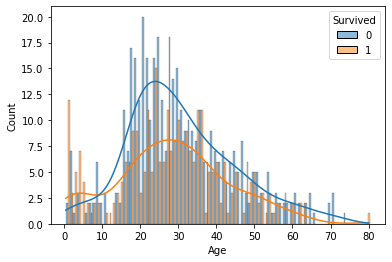

In [21]:
sns.histplot(x='Age', data=train_data, hue='Survived', multiple='dodge', binwidth=1, kde=True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

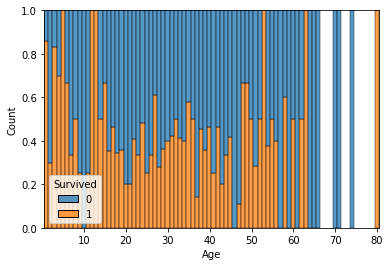

In [22]:
sns.histplot(x='Age', data=train_data, hue='Survived', multiple='fill', binwidth=1)

Age-Pclass Interaction

<AxesSubplot:xlabel='Age', ylabel='Count'>

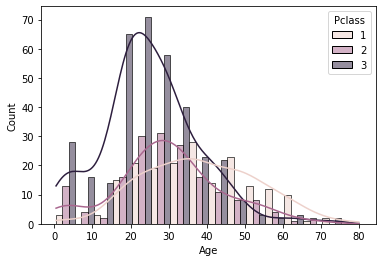

In [23]:
sns.histplot(x='Age', data=train_data, hue='Pclass', multiple='dodge', binwidth=5, kde=True)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

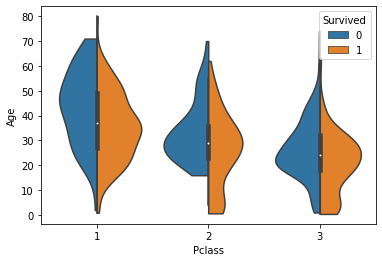

In [24]:
sns.violinplot(x='Pclass', y='Age', hue='Survived', split=True ,data=train_data , cut=0)

Age-Sex Interaction

<AxesSubplot:xlabel='Age', ylabel='Count'>

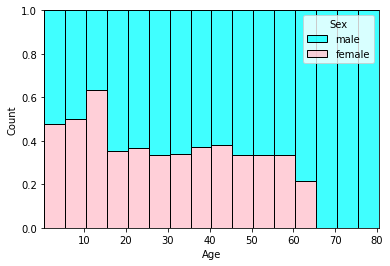

In [25]:
sns.histplot(x='Age', data=train_data, hue='Sex', multiple='fill', binwidth=5, palette={"male": "cyan", "female": "pink"})

<AxesSubplot:xlabel='Age', ylabel='Count'>

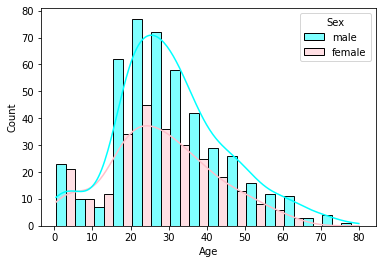

In [26]:
sns.histplot(x='Age', data=train_data, hue='Sex', multiple='dodge', binwidth=5, kde=True,palette={"male": "cyan", "female": "pink"})

<AxesSubplot:xlabel='Sex', ylabel='Age'>

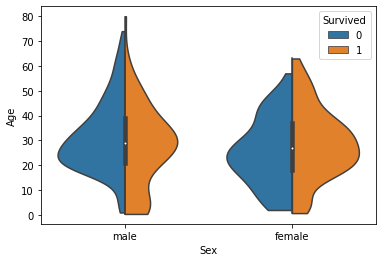

In [27]:
sns.violinplot(x='Sex', y='Age', hue='Survived', split=True ,data=train_data, cut=0 )

Age-Pclass-Sex Interaction

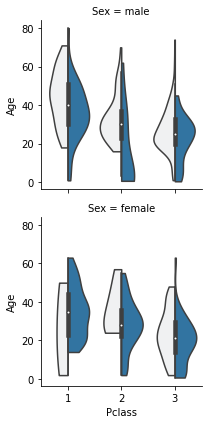

In [28]:
sns.FacetGrid(train_data, row='Sex').map(sns.violinplot, 'Pclass', 'Age', 'Survived', split=True, order=[1,2,3], hue_order=[0, 1], cut=0)

In [29]:
print('Pclass 2 adult male survivors:',round(len(train_data[(train_data['Pclass']==2) & \
        (train_data['Age']>19) & (train_data['Sex']=='male') & (train_data['Survived'] \
        == True)])/len(train_data[(train_data['Pclass']==2) & (train_data['Age']>19) & \
        (train_data['Sex']=='male')])*100,1),'%')

print('Pclass 3 adult male survivors:',round(len(train_data[(train_data['Pclass']==3) & \
        (train_data['Age']>19) & (train_data['Sex']=='male') & (train_data['Survived'] \
        == True)])/len(train_data[(train_data['Pclass']==3) & (train_data['Age']>19) & \
        (train_data['Sex']=='male')])*100,1),'%')

Pclass 2 adult male survivors: 6.2 %
Pclass 3 adult male survivors: 13.7 %


In [30]:
round(train_data [['Sex', 'Pclass','Survived']].groupby(['Pclass', 'Sex']).agg(['count','mean']),3)

Survived       
                 count   mean
Pclass Sex                   
1      female       94  0.968
       male        122  0.369
2      female       76  0.921
       male        108  0.157
3      female      144  0.500
       male        347  0.135

SibSp

<AxesSubplot:xlabel='SibSp', ylabel='Count'>

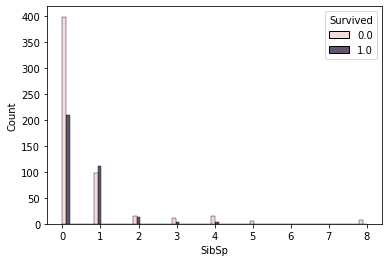

In [31]:
sns.histplot(x='SibSp', data=titanic, hue='Survived', multiple='dodge')

Parch

<AxesSubplot:xlabel='Parch', ylabel='Count'>

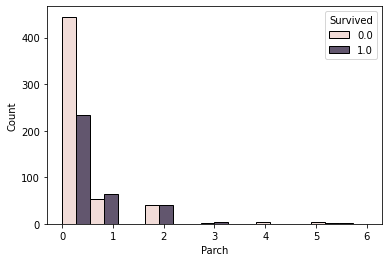

In [32]:
sns.histplot(x='Parch', data=titanic, hue='Survived', multiple='dodge')

### Fare

<AxesSubplot:xlabel='Fare', ylabel='Density'>

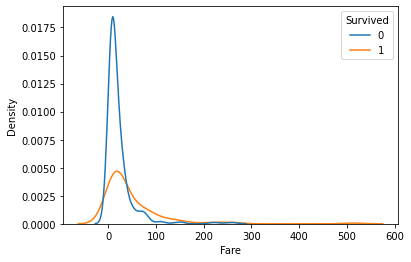

In [33]:
sns.kdeplot(x='Fare', data=train_data, hue='Survived')

In [34]:
train_data[(train_data['Fare']==0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [35]:
train_data[(train_data['Fare']==0)].groupby('Pclass').agg('count')

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,5,5,5,5,3,5,5,5,5,3,5
2,6,6,6,6,0,6,6,6,6,0,6
3,4,4,4,4,4,4,4,4,4,0,4


In [36]:
train_data[(train_data['Fare']==0)].groupby(['Pclass', 'Ticket']).agg('count')

PassengerId  Survived  Name  Sex  Age  SibSp  Parch  Fare  \
Pclass Ticket                                                              
1      112050            1         1     1    1    1      1      1     1   
       112052            1         1     1    1    0      1      1     1   
       112058            1         1     1    1    0      1      1     1   
       112059            1         1     1    1    1      1      1     1   
       19972             1         1     1    1    1      1      1     1   
2      239853            3         3     3    3    0      3      3     3   
       239854            1         1     1    1    0      1      1     1   
       239855            1         1     1    1    0      1      1     1   
       239856            1         1     1    1    0      1      1     1   
3      LINE              4         4     4    4    4      4      4     4   

               Cabin  Embarked  
Pclass Ticket                   
1      112050      1         1  
       112052      0         1  
       112058      1         1  
       112059      1         1  
       19972       0         1  
2      239853      0         3  
       239854      0         1  
       239855      0         1  
       239856      0         1  
3      LINE        0         4

### Embarked

In [37]:
round(train_data[['Embarked','Survived']].groupby('Embarked').agg(['count','mean']),3)

Survived       
            count   mean
Embarked                
C             168  0.554
Q              77  0.390
S             644  0.337

<AxesSubplot:xlabel='Embarked', ylabel='Count'>

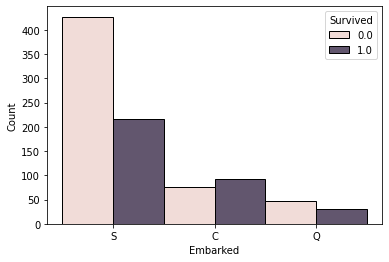

In [38]:
sns.histplot(x='Embarked', data=titanic, hue='Survived', multiple='dodge')

Embarked-Pclass Interaction

In [39]:
round(train_data [['Embarked', 'Pclass','Survived']].groupby(['Pclass', 'Embarked']).agg(['count','mean']),2)

Survived      
                   count  mean
Pclass Embarked               
1      C              85  0.69
       Q               2  0.50
       S             127  0.58
2      C              17  0.53
       Q               3  0.67
       S             164  0.46
3      C              66  0.38
       Q              72  0.38
       S             353  0.19

<AxesSubplot:xlabel='Embarked', ylabel='Count'>

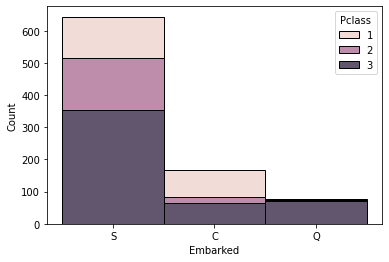

In [40]:
sns.histplot(x='Embarked', data=train_data, hue='Pclass', multiple='stack')

Embarked-Sex Interaction

In [41]:
round(train_data [['Embarked', 'Sex','Survived']].groupby(['Sex', 'Embarked']).agg(['count','mean']),2)

Survived      
                   count  mean
Sex    Embarked               
female C              73  0.88
       Q              36  0.75
       S             203  0.69
male   C              95  0.31
       Q              41  0.07
       S             441  0.17

<AxesSubplot:xlabel='Embarked', ylabel='Count'>

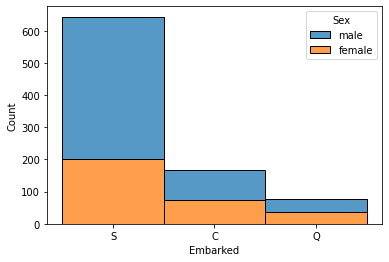

In [42]:
sns.histplot(x='Embarked', data=train_data, hue='Sex', multiple='stack')

Embarked-Age Interaction

<AxesSubplot:xlabel='Age', ylabel='Count'>

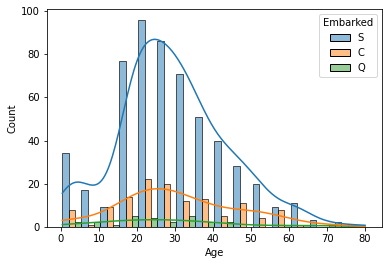

In [43]:
sns.histplot(x='Age', data=train_data, hue='Embarked', multiple='dodge', binwidth=5, kde=True)

<AxesSubplot:xlabel='Embarked', ylabel='Age'>

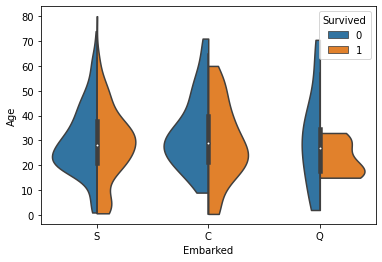

In [44]:
sns.violinplot(x='Embarked', y='Age', hue='Survived', split=True ,data=train_data, cut=0 )

## Feature Engineering and missing imputation

Feature Engineering

### Family

In [45]:
train_data['Family']= train_data.Parch + train_data.SibSp + 1
test_data['Family']= test_data.Parch + test_data.SibSp + 1

In [46]:
round(train_data [['Family','Survived']].groupby(['Family']).agg(['count','mean']),3)

Survived       
          count   mean
Family                
1           537  0.304
2           161  0.553
3           102  0.578
4            29  0.724
5            15  0.200
6            22  0.136
7            12  0.333
8             6  0.000
11            7  0.000

<AxesSubplot:xlabel='Family', ylabel='Count'>

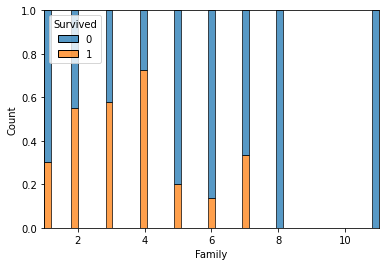

In [47]:
sns.histplot(x='Family', data=train_data, hue='Survived', multiple='fill')

### Num_ticket

In [48]:
num_tickets = titanic.groupby(['Ticket']).size()
num_tickets.name='Num_Ticket'
num_tickets = num_tickets.reset_index()

train_data = train_data.merge(num_tickets, on='Ticket')
test_data = test_data.merge(num_tickets, on='Ticket')

In [49]:
round(train_data [['Num_Ticket','Survived']].groupby(['Num_Ticket']).agg(['count','mean']),3)

Survived       
              count   mean
Num_Ticket                
1               481  0.270
2               181  0.514
3               101  0.653
4                44  0.727
5                21  0.333
6                19  0.211
7                24  0.208
8                13  0.385
11                7  0.000

<AxesSubplot:xlabel='Num_Ticket', ylabel='Count'>

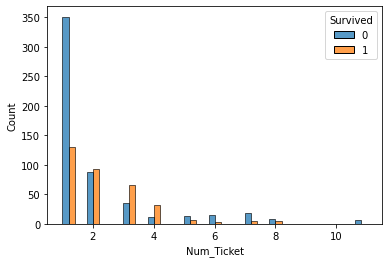

In [50]:
sns.histplot(x='Num_Ticket', data=train_data, hue='Survived', multiple='dodge')

### Ind_Fare

In [51]:
train_data['Ind_Fare']= train_data.Fare / train_data.Num_Ticket
test_data['Ind_Fare']= test_data.Fare / test_data.Num_Ticket

<AxesSubplot:xlabel='Ind_Fare', ylabel='Count'>

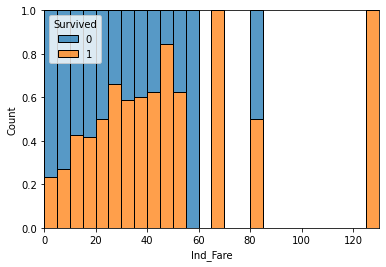

In [52]:
sns.histplot(x='Ind_Fare', data=train_data, hue='Survived', multiple='fill', binwidth=5)

### Title

In [53]:
train_data['Title'] = train_data.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
test_data['Title'] = test_data.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

def replace_titles(x):
    title=x['Title']
    if title in ['Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title in ['Capt','Col','Major']:
        return 'Officer'
    elif title in ['Jonkheer', 'Don', 'Sir', 'Rev', 'Dr', 'the Countess', 'Dona', 'Lady']:
        return 'Royalty'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title
    
train_data['Title']=train_data.apply(replace_titles, axis=1)
test_data['Title']=test_data.apply(replace_titles, axis=1)

In [54]:
round(train_data [['Title','Survived']].groupby(['Title']).agg(['count','mean']),3)

Survived       
           count   mean
Title                  
Master        40  0.575
Miss         185  0.703
Mr           517  0.157
Mrs          126  0.794
Officer        5  0.400
Royalty       18  0.333

<AxesSubplot:xlabel='Title', ylabel='Count'>

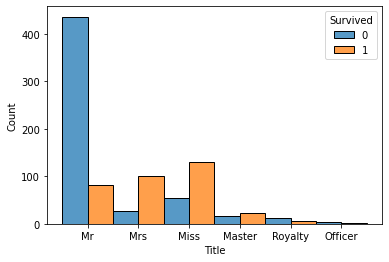

In [55]:
sns.histplot(x='Title', data=train_data, hue='Survived', multiple='dodge', binwidth=5)

### Deck

In [56]:
train_data['Deck']=train_data.Cabin.str[0]
#train_data['Missing_Deck']= train_data.Deck.isnull()
train_data['Deck']=train_data.Deck.fillna('NA')

test_data['Deck']=test_data.Cabin.str[0]
test_data['Deck']=test_data.Deck.fillna('NA')

In [57]:
round(train_data [['Deck','Survived']].groupby(['Deck']).agg(['count','mean']),3)

Survived       
        count   mean
Deck                
A          15  0.467
B          47  0.745
C          59  0.593
D          33  0.758
E          32  0.750
F          13  0.615
G           4  0.500
NA        687  0.300
T           1  0.000

<AxesSubplot:xlabel='Deck', ylabel='Count'>

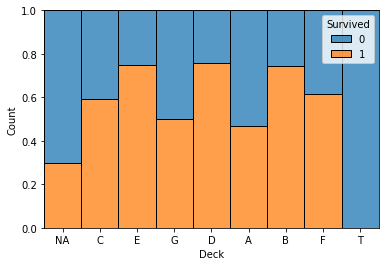

In [58]:
sns.histplot(x='Deck', data=train_data, hue='Survived', multiple='fill', binwidth=5)

Missing Value imputation

Age

In [59]:
round(train_data [['Title','Pclass','Age']].groupby(['Title','Pclass']).agg(['count','mean']),3)

Age        
               count    mean
Title   Pclass              
Master  1          3   5.307
        2          9   2.259
        3         24   5.351
Miss    1         47  29.745
        2         33  22.561
        3         69  16.123
Mr      1         87  41.580
        2         82  32.768
        3        229  28.725
Mrs     1         35  40.400
        2         41  33.683
        3         33  33.515
Officer 1          5  56.600
Royalty 1          9  42.556
        2          8  42.000

In [60]:
print ("Avg age of 'Miss' Title", round(train_data[train_data.Title=="Miss"]['Age'].mean()))

print ("Avg age of 'Miss' Title travelling without Parents", round(train_data[(train_data.Title=="Miss") & (train_data.Parch==0)]['Age'].mean()))

print ("Avg age of 'Miss' Title travelling with Parents", round(train_data[(train_data.Title=="Miss") & (train_data.Parch!=0)]['Age'].mean()), '\n')

Avg age of 'Miss' Title 22
Avg age of 'Miss' Title travelling without Parents 28
Avg age of 'Miss' Title travelling with Parents 12 



In [61]:
[df['Age'].fillna(df.groupby(['Pclass','Sex','Title'])['Age'].transform('mean'), inplace=True) for df in [train_data, test_data]]

[None, None]

In [62]:
display(titanic[(titanic.Ticket== 'W./C. 6607')])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
783,784,0.0,3,"Johnston, Mr. Andrew G",male,NaN,1,2,W./C. 6607,23.45,NaN,S
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
924,925,NaN,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
1135,1136,NaN,3,"Johnston, Master. William Arthur Willie""""",male,NaN,1,2,W./C. 6607,23.45,NaN,S


Fare

In [63]:
display(titanic[titanic.Fare.isnull()])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [64]:
print('Mean fare for this category: ', train_data[(train_data.Embarked=='S') & (train_data.Pclass==3)]['Ind_Fare'].mean())

Mean fare for this category:  7.382647773383368


In [65]:
test_data.loc[test_data.Fare.isnull(), ['Fare','Ind_Fare']] = round(train_data[(train_data.Embarked=='S') & (train_data.Pclass==3) & (train_data.Num_Ticket==1)]['Fare'].mean(),1)

In [66]:
#display(test_data[test_data.Fare.isnull()])

Embarked

In [67]:
display(titanic[titanic.Embarked.isnull()])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [68]:
train_data[(train_data.Pclass==1)].groupby('Embarked').agg({'Ind_Fare': 'mean', 'Fare': 'mean', 'PassengerId': 'count'})

,Ind_Fare,Fare,PassengerId
Embarked,,,
C,39.179223,104.718529,85
Q,30.000000,90.000000,2
S,30.211849,70.364862,127


In [69]:
train_data.Embarked.fillna('C', inplace=True)

Cabin

In [70]:
train_data['Cabin']=train_data.Deck.fillna('NA')
test_data['Cabin']=train_data.Deck.fillna('NA')

In [71]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  Family       891 non-null    int64  
 13  Num_Ticket   891 non-null    int64  
 14  Ind_Fare     891 non-null    float64
 15  Title        891 non-null    object 
 16  Deck         891 non-null    object 
dtypes: float64(3), int64(7), object(7)
memory usage: 157.6+ KB


In [72]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
 11  Family       418 non-null    int64  
 12  Num_Ticket   418 non-null    int64  
 13  Ind_Fare     418 non-null    float64
 14  Title        418 non-null    object 
 15  Deck         418 non-null    object 
dtypes: float64(3), int64(6), object(7)
memory usage: 55.5+ KB


Interactions

In [73]:
#titanic=titanic.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [74]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Transformacion manual

In [75]:
traintanic=train_data
#traintanic['Family']= traintanic.Parch + traintanic.SibSp
#traintanic = traintanic.merge(num_tickets, on='Ticket')
#traintanic['Ind_Fare']= traintanic.Fare / traintanic.Num_Ticket
#traintanic['Title'] = traintanic.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
#traintanic['Title']=traintanic.apply(replace_titles, axis=1)
#traintanic['Missing_Age']= traintanic.Age.isnull()
#traintanic.Age.fillna(30,inplace=True)
#traintanic['Deck']=traintanic.Cabin.str[0]
#traintanic['Missing_Deck']= traintanic.Deck.isnull()
#traintanic['Deck']=traintanic.Deck.fillna('NA')
traintanic['Norm_Ind_Fare'] = np.log(traintanic.Ind_Fare+1)
traintanic=traintanic.drop(['PassengerId','Name','Ticket','Cabin', 'Ind_Fare', 'Fare', 'Family'],axis=1)
#traintanic.Embarked.fillna(traintanic.Embarked.mode()[0], inplace = True)
traintanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       891 non-null    int64  
 1   Pclass         891 non-null    int64  
 2   Sex            891 non-null    object 
 3   Age            891 non-null    float64
 4   SibSp          891 non-null    int64  
 5   Parch          891 non-null    int64  
 6   Embarked       891 non-null    object 
 7   Num_Ticket     891 non-null    int64  
 8   Title          891 non-null    object 
 9   Deck           891 non-null    object 
 10  Norm_Ind_Fare  891 non-null    float64
dtypes: float64(2), int64(5), object(4)
memory usage: 115.8+ KB


In [76]:
testanic=test_data
#testanic['Family']= testanic.Parch + testanic.SibSp
#testanic = testanic.merge(num_tickets, on='Ticket')
#testanic['Ind_Fare']= testanic.Fare / testanic.Num_Ticket
#testanic['Title'] = testanic.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
#testanic['Title']=testanic.apply(replace_titles, axis=1)
#testanic['Missing_Age']= testanic.Age.isnull()
#testanic.Age.fillna(testanic.Age.mean,inplace=True)
#testanic['Deck']=testanic.Cabin.str[0]
#testanic['Missing_Deck']= testanic.Deck.isnull()
#testanic['Deck']=testanic.Deck.fillna('NA')
testanic['Norm_Ind_Fare'] = np.log(testanic.Ind_Fare+1)
testanic=testanic.drop(['PassengerId','Name','Ticket','Cabin','Ind_Fare','Fare','Family'],axis=1)
#testanic.Embarked.fillna(testanic.Embarked.mode()[0], inplace = True)
testanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pclass         418 non-null    int64  
 1   Sex            418 non-null    object 
 2   Age            418 non-null    float64
 3   SibSp          418 non-null    int64  
 4   Parch          418 non-null    int64  
 5   Embarked       418 non-null    object 
 6   Num_Ticket     418 non-null    int64  
 7   Title          418 non-null    object 
 8   Deck           418 non-null    object 
 9   Norm_Ind_Fare  418 non-null    float64
dtypes: float64(2), int64(4), object(4)
memory usage: 35.9+ KB


# EXPLORER DATA

In [77]:
traintanic.corr()

,Survived,Pclass,Age,SibSp,Parch,Num_Ticket,Norm_Ind_Fare
Survived,1.000000,-0.338481,-0.076902,-0.035322,0.081629,0.064962,0.306219
Pclass,-0.338481,1.000000,-0.403311,0.083081,0.018443,-0.039893,-0.771307
Age,-0.076902,-0.403311,1.000000,-0.275944,-0.192509,-0.240968,0.362118
SibSp,-0.035322,0.083081,-0.275944,1.000000,0.414838,0.727331,-0.104095
Parch,0.081629,0.018443,-0.192509,0.414838,1.000000,0.638361,-0.090328
Num_Ticket,0.064962,-0.039893,-0.240968,0.727331,0.638361,1.000000,-0.044123
Norm_Ind_Fare,0.306219,-0.771307,0.362118,-0.104095,-0.090328,-0.044123,1.000000


In [78]:
traintanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Num_Ticket,Title,Deck,Norm_Ind_Fare
0,0,3,male,22.0,1,0,S,1,Mr,NA,2.110213
1,1,1,female,38.0,1,0,C,2,Mrs,C,3.601186
2,1,3,female,26.0,0,0,S,1,Miss,NA,2.188856
3,1,1,female,35.0,1,0,S,2,Mrs,C,3.316003
4,0,1,male,37.0,1,0,S,2,Mr,C,3.316003


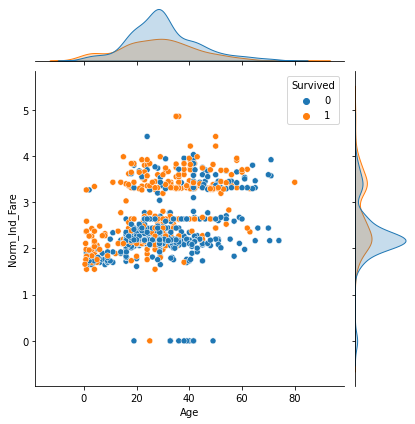

In [79]:
sns.jointplot(data=traintanic, x="Age", y="Norm_Ind_Fare", hue="Survived")

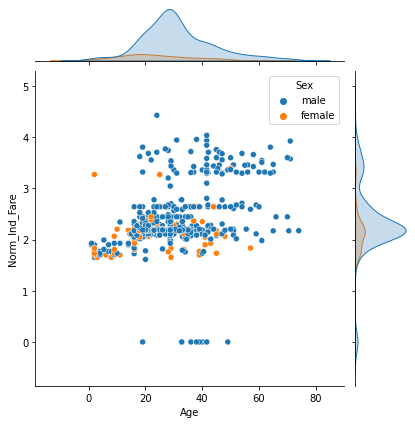

In [80]:
sns.jointplot(data=traintanic[(traintanic.Survived==0)], x="Age", y="Norm_Ind_Fare", hue="Sex")

Pipelines

In [81]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


In [82]:
num_attribs = ['Age','SibSp','Parch','Num_Ticket','Norm_Ind_Fare']
cat_attribs = ['Pclass','Sex', 'Embarked', 'Title','Deck']

numeric_preprocessor = Pipeline(
    steps = [
        #("imputation_mean", SimpleImputer(missing_values=np.nan, strategy="mean")),
        ("scaler", StandardScaler())
    ]
)

categorical_preprocessor = Pipeline(
    steps = [
        #("imputation_constant", SimpleImputer(fill_value="missing", strategy="constant")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
        
    ]
)

preprocessor = ColumnTransformer([
    ("cat", categorical_preprocessor, cat_attribs),
    ("num", numeric_preprocessor, num_attribs)
])


Selecting Data

In [83]:
#traintanic=train_data
#testanic=test_data

In [84]:
pY_traintanic = traintanic["Survived"]
pX_traintanic = traintanic.drop("Survived", axis=1)
pX_traintanic

,Pclass,Sex,Age,SibSp,Parch,Embarked,Num_Ticket,Title,Deck,Norm_Ind_Fare
0,3,male,22.0,1,0,S,1,Mr,NA,2.110213
1,1,female,38.0,1,0,C,2,Mrs,C,3.601186
2,3,female,26.0,0,0,S,1,Miss,NA,2.188856
3,1,female,35.0,1,0,S,2,Mrs,C,3.316003
4,1,male,37.0,1,0,S,2,Mr,C,3.316003
...,...,...,...,...,...,...,...,...,...,...
886,3,male,25.0,0,0,S,1,Mr,NA,2.085672
887,2,male,27.0,0,0,S,1,Royalty,NA,2.639057
888,1,female,19.0,0,0,S,1,Miss,B,3.433987
889,1,male,26.0,0,0,C,1,Mr,C,3.433987


In [85]:
Y_traintanic = traintanic["Survived"]

features = ["Pclass", "Sex", "Embarked", "Title", "Deck"]

A_traintanic = pd.get_dummies(traintanic[features])
B_traintanic = traintanic[['Age','SibSp','Parch','Num_Ticket','Norm_Ind_Fare']]
X_traintanic = pd.concat([A_traintanic,B_traintanic],axis=1)
X_traintanic=X_traintanic.drop(['Deck_T'],axis=1)
X_traintanic.info()

A_testanic = pd.get_dummies(testanic[features])
B_testanic = testanic[['Age','SibSp','Parch','Num_Ticket','Norm_Ind_Fare']]
X_testanic = pd.concat([A_testanic,B_testanic],axis=1)

X_testanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pclass         891 non-null    int64  
 1   Sex_female     891 non-null    uint8  
 2   Sex_male       891 non-null    uint8  
 3   Embarked_C     891 non-null    uint8  
 4   Embarked_Q     891 non-null    uint8  
 5   Embarked_S     891 non-null    uint8  
 6   Title_Master   891 non-null    uint8  
 7   Title_Miss     891 non-null    uint8  
 8   Title_Mr       891 non-null    uint8  
 9   Title_Mrs      891 non-null    uint8  
 10  Title_Officer  891 non-null    uint8  
 11  Title_Royalty  891 non-null    uint8  
 12  Deck_A         891 non-null    uint8  
 13  Deck_B         891 non-null    uint8  
 14  Deck_C         891 non-null    uint8  
 15  Deck_D         891 non-null    uint8  
 16  Deck_E         891 non-null    uint8  
 17  Deck_F         891 non-null    uint8  
 18  Deck_G    

Training and Evaluating(Cross-Validation)

In [86]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())


## GD Classifier (Stochastic)

Stochastic, batch and mini-batch

Stochastic Gradient Descent (hyperparams >=2 , features Scaling required(StandardScaler)
Hyperparameters:
- Learning rate: too small(long time to converge). too big (diverge from solution)
- epoch: rounds of iterations
- 


In [87]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(X_traintanic, Y_traintanic)
sgd_clf.score(X_traintanic, Y_traintanic)

0.8249158249158249

In [88]:
sgd_scores = cross_val_score(sgd_clf, X_traintanic, Y_traintanic,
                         scoring="accuracy", cv=5)

display_scores(sgd_scores)

Scores: [0.69273743 0.41573034 0.41573034 0.74719101 0.7752809 ]
Mean: 0.6093340028874522
Standard deviation: 0.16028962383788498


In [89]:
from sklearn.model_selection import cross_val_predict

Y_traintanic_pred = cross_val_predict(sgd_clf, X_traintanic, Y_traintanic, cv=5)

In [90]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_traintanic, Y_traintanic_pred)

array([[442, 107],
       [ 69, 273]])

In [91]:
pipe = Pipeline(
    steps=[("preprocessor", preprocessor),
           ("classifier", SGDClassifier())]
)

pipe_scores = cross_val_score(pipe, pX_traintanic, pY_traintanic,
                         scoring="accuracy", cv=5)

display_scores(pipe_scores)

Scores: [0.65921788 0.75280899 0.80337079 0.80337079 0.79213483]
Mean: 0.7621806540706798
Standard deviation: 0.05473512276070439


## Random Forest Classifier (Ensemble)

In [92]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(max_depth=5)
forest_clf.fit(X_traintanic, Y_traintanic)
forest_clf.score(X_traintanic, Y_traintanic)

0.8462401795735129

In [93]:
forest_scores = cross_val_score(forest_clf, X_traintanic, Y_traintanic,
                         scoring="accuracy", cv=5)

display_scores(forest_scores)

Scores: [0.79329609 0.83707865 0.8258427  0.8258427  0.81460674]
Mean: 0.8193333751804659
Standard deviation: 0.014831848748632293


In [94]:
Y_traintanic_pred = cross_val_predict(sgd_clf, X_traintanic, Y_traintanic, cv=5)
confusion_matrix(Y_traintanic, Y_traintanic_pred)

array([[458,  91],
       [128, 214]])

In [95]:
pipe = Pipeline(
    steps=[("preprocessor", preprocessor),
           ("classifier", RandomForestClassifier(max_depth=4))]
)

pipe_scores = cross_val_score(pipe, pX_traintanic, pY_traintanic,
                         scoring="accuracy", cv=5)

display_scores(pipe_scores)

Scores: [0.73743017 0.83707865 0.82022472 0.83146067 0.82022472]
Mean: 0.8092837863285418
Standard deviation: 0.03651498168848253


## Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression

#lr_clf=LogisticRegression(solver='liblinear', penalty="l1")
lr_clf=LogisticRegression(max_iter=1000)
lr_clf.fit(X_traintanic, Y_traintanic)
lr_clf.score(X_traintanic, Y_traintanic)

0.8406285072951739

In [97]:
lr_scores = cross_val_score(lr_clf, X_traintanic, Y_traintanic,
                         scoring="accuracy", cv=5)

display_scores(lr_scores)

Scores: [0.79888268 0.84831461 0.80337079 0.79775281 0.84269663]
Mean: 0.8182035026049839
Standard deviation: 0.022441596667832173


In [98]:
Y_traintanic_pred = cross_val_predict(lr_clf, X_traintanic, Y_traintanic, cv=5)
confusion_matrix(Y_traintanic, Y_traintanic_pred)

array([[468,  81],
       [ 81, 261]])

In [99]:
pipe = Pipeline(
    steps=[("preprocessor", preprocessor),
           ("classifier", LogisticRegression())]
)

pipe_scores = cross_val_score(pipe, pX_traintanic, pY_traintanic,
                         scoring="accuracy", cv=5)

display_scores(pipe_scores)

Scores: [0.79888268 0.85393258 0.79775281 0.79213483 0.83146067]
Mean: 0.8148327160881299
Standard deviation: 0.023944141144592358


## KNN

In [100]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)

In [101]:
knn_scores = cross_val_score(knn_clf, X_traintanic, Y_traintanic,
                         scoring="accuracy", cv=5)

display_scores(knn_scores)

Scores: [0.65921788 0.80337079 0.75842697 0.79213483 0.80337079]
Mean: 0.7633042495762978
Standard deviation: 0.0545886765642196


In [102]:
Y_traintanic_pred = cross_val_predict(knn_clf, X_traintanic, Y_traintanic, cv=5)
confusion_matrix(Y_traintanic, Y_traintanic_pred)

array([[454,  95],
       [116, 226]])

In [103]:
pipe = Pipeline(
    steps=[("preprocessor", preprocessor),
           ("classifier", KNeighborsClassifier(algorithm = 'brute', n_jobs=-1))]
)

pipe_scores = cross_val_score(pipe, pX_traintanic, pY_traintanic,
                         scoring="accuracy", cv=5)

display_scores(pipe_scores)

Scores: [0.77094972 0.83707865 0.8258427  0.81460674 0.79213483]
Mean: 0.8081225284037412
Standard deviation: 0.023798867814205246


## SVM

Support Vector Machine (feature scaling needed)
Hyperparameters:
- c
- kernel

In [104]:
from sklearn.svm import SVC

svm_clf = SVC(C=1000)

svm_scores = cross_val_score(svm_clf, X_traintanic, Y_traintanic,
                         scoring="accuracy", cv=5)

display_scores(svm_scores)

Scores: [0.79888268 0.83707865 0.79213483 0.80898876 0.83146067]
Mean: 0.813709120582512
Standard deviation: 0.017713315043796876


In [105]:
from sklearn.svm import SVC

svc_clf = SVC(kernel="poly", degree=15, coef0=1, C=0.01)

svc_scores = cross_val_score(svc_clf, X_traintanic, Y_traintanic,
                         scoring="accuracy", cv=5)

display_scores(svc_scores)

Scores: [0.67597765 0.83146067 0.78651685 0.78089888 0.81460674]
Mean: 0.7778921599397401
Standard deviation: 0.05419877951845565


Pipeline

In [106]:
pipe = Pipeline(
    steps=[("preprocessor", preprocessor),
           ("classifier", SVC(kernel="poly", degree=8, coef0=1, C=0.01))]
)

pipe_scores = cross_val_score(pipe, pX_traintanic, pY_traintanic,
                         scoring="accuracy", cv=5)

display_scores(pipe_scores)

Scores: [0.74860335 0.81460674 0.80898876 0.78089888 0.80337079]
Mean: 0.7912937040989265
Standard deviation: 0.02421977453006048


Grid search svc

from sklearn.model_selection import GridSearchCV
param_grid = [
    {'kernel':["poly"],'degree':[1,2,4,6,8,10],
     'coef0':[1,2,5,10], 'C': [0.1,0.01,0.001]}
]
svc_clf2= SVC()
grid_search = GridSearchCV(svc_clf2, param_grid, cv=5,
                           scoring="accuracy",
                           return_train_score=False)
grid_search.fit(X_traintanic, Y_traintanic)
grid_search.best_params_

## Naive Bayes

In [107]:
from sklearn.naive_bayes import MultinomialNB

nb_clf = MultinomialNB()

nb_scores = cross_val_score(nb_clf, X_traintanic, Y_traintanic,
                         scoring="accuracy", cv=5)

display_scores(nb_scores)

Scores: [0.64804469 0.78651685 0.81460674 0.81460674 0.81460674]
Mean: 0.7756763542778231
Standard deviation: 0.0647365161638956


In [108]:
pipe = Pipeline(
    steps=[("preprocessor", preprocessor),
           ("classifier", MultinomialNB())]
)

pipe_scores = cross_val_score(pipe, pX_traintanic, pY_traintanic,
                         scoring="accuracy", cv=5)

display_scores(pipe_scores)

Scores: [nan nan nan nan nan]
Mean: nan
Standard deviation: nan


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/naive_bayes.py", line 690, in fit
    self._count(X, Y)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/naive_ba

## Decision Tree

In [109]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()

tree_scores = cross_val_score(tree_clf, X_traintanic, Y_traintanic,
                         scoring="accuracy", cv=5)

display_scores(tree_scores)

Scores: [0.74301676 0.74719101 0.80337079 0.80337079 0.73595506]
Mean: 0.766580880045195
Standard deviation: 0.030252835570563866


## Bagging Decision Tree (Ensemble)

In [110]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(),
                            max_samples=0.5,
                            max_features=1.0,
                            n_estimators=10)

bag_scores = cross_val_score(bag_clf, X_traintanic, Y_traintanic,
                         scoring="accuracy", cv=5)

display_scores(bag_scores)

Scores: [0.78212291 0.81460674 0.78651685 0.84269663 0.82022472]
Mean: 0.8092335697696316
Standard deviation: 0.02245212688079555


## Boosting Decision Tree (ensemble)

In [111]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

adb_clf = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,
                                                    max_depth=4),
                             n_estimators=10,
                             learning_rate=0.6)

adb_scores = cross_val_score(adb_clf, X_traintanic, Y_traintanic,
                         scoring="accuracy", cv=5)

display_scores(adb_scores)

Scores: [0.7877095  0.81460674 0.80898876 0.8258427  0.79775281]
Mean: 0.8069801016885318
Standard deviation: 0.01322495350425404


In [112]:
pipe = Pipeline(
    steps=[("preprocessor", preprocessor),
           ("classifier", AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,
                                                    max_depth=4),
                             n_estimators=10,
                             learning_rate=0.6))]
)

pipe_scores = cross_val_score(pipe, pX_traintanic, pY_traintanic,
                         scoring="accuracy", cv=5)

display_scores(pipe_scores)

Scores: [0.75977654 0.80337079 0.81460674 0.82022472 0.79775281]
Mean: 0.7991463184985249
Standard deviation: 0.02122777144094815


## Voting Classifier (Ensemble)

In [113]:
from sklearn.ensemble import VotingClassifier

evc_clf = VotingClassifier(estimators=[('mnb',nb_clf),('lr',lr_clf),('rf',forest_clf),('svm',svm_clf)],
                           voting='hard')

evc_scores = cross_val_score(evc_clf, X_traintanic, Y_traintanic,
                         scoring="accuracy", cv=5)

display_scores(evc_scores)

Scores: [0.79329609 0.84269663 0.80898876 0.82022472 0.8258427 ]
Mean: 0.8182097796748478
Standard deviation: 0.016538719996017193


## Neural Network (Deep Learning)

In [114]:
pass

Fine Tune (Grid Search CV)

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]


grid_search = GridSearchCV(lr_clf, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True)

grid_search.fit(X_traintanic, Y_traintanic)
grid_search.best_params_

Prepare the data for machine Learning Algorithms

Predictions

In [115]:
#model_selected = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
#model_selected.fit(X_traintanic, Y_traintanic)
#predictions = model.predict(X_testanic)

In [116]:
# My version
model_selected = RandomForestClassifier(max_depth=5)
#model_selected = LogisticRegression(max_iter=1500)
model_selected.fit(X_traintanic, Y_traintanic)
predictions = model_selected.predict(X_testanic)

In [117]:
Y_testanic = pd.Series(predictions)
Y_testanic.name = 'Survived'

In [118]:
test = pd.concat([testanic,Y_testanic],axis=1)
test

,Pclass,Sex,Age,SibSp,Parch,Embarked,Num_Ticket,Title,Deck,Norm_Ind_Fare,Survived
0,3,male,34.500000,0,0,Q,1,Mr,NA,2.178064,0
1,3,female,47.000000,1,0,S,1,Mrs,NA,2.079442,1
2,2,male,62.000000,0,0,Q,1,Mr,NA,2.369075,0
3,3,male,27.000000,0,0,S,1,Mr,NA,2.268252,0
4,3,female,22.000000,1,1,S,2,Mrs,NA,1.966238,1
...,...,...,...,...,...,...,...,...,...,...,...
413,3,male,27.198795,0,0,S,1,Mr,NA,2.202765,0
414,1,female,39.000000,0,0,C,3,Royalty,C,3.618993,1
415,3,male,38.500000,0,0,S,1,Mr,NA,2.110213,0
416,3,male,27.198795,0,0,S,1,Mr,NA,2.202765,0


In [119]:
round(test [['Sex', 'Pclass','Survived']].groupby(['Pclass', 'Sex']).agg(['count','mean']),3)

Survived       
                 count   mean
Pclass Sex                   
1      female       50  1.000
       male         57  0.070
2      female       30  1.000
       male         63  0.032
3      female       72  0.917
       male        146  0.082

In [120]:
round(test [['Sex','Survived']].groupby(['Sex']).agg(['count','mean']),3)

Survived       
          count   mean
Sex                   
female      152  0.961
male        266  0.068

In [121]:
round(test [['Title','Survived']].groupby(['Title']).agg(['count','mean']),3)

Survived       
           count   mean
Title                  
Master        21  0.762
Miss          79  0.949
Mr           240  0.000
Mrs           72  0.972
Officer        2  1.000
Royalty        4  0.250

In [122]:
round(train_data [['Title','Survived']].groupby(['Title']).agg(['count','mean']),3)

Survived       
           count   mean
Title                  
Master        40  0.575
Miss         185  0.703
Mr           517  0.157
Mrs          126  0.794
Officer        5  0.400
Royalty       18  0.333

OUTPUT

In [123]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
